In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [35]:
import pickle
import numpy as np;
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

In [3]:
regression_data = pickle.load(open( "train_histo.p", "rb"))

In [12]:
X_train = regression_data['train_x']
Y_train = regression_data['train_y']

X_test = regression_data['val_x']
Y_test = regression_data['val_y']

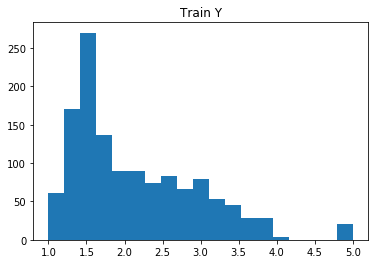

In [13]:
plt.hist(Y_train, bins='auto') 
plt.title("Train Y")
plt.show()

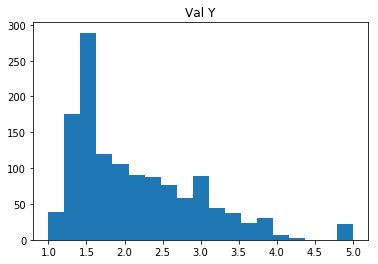

In [14]:
plt.hist(Y_test, bins='auto')  
plt.title("Val Y")
plt.show()

In [33]:
def get_Score(model):
    y_train_predict = model.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    r2 = r2_score(Y_train, y_train_predict)

    print("The model performance for training set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2)) 
    print('mean_absolute_error is {}'.format(mean_absolute_error(Y_train, y_train_predict)))
    print("\n")

    y_test_predict = model.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    r2 = r2_score(Y_test, y_test_predict)

    print("The model performance for testing set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print('mean_absolute_error is {}'.format(mean_absolute_error(Y_test, y_test_predict)))

### Linear Regression

In [36]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

get_Score(lin_model)

The model performance for training set
--------------------------------------
RMSE is 0.21288286343138443
R2 score is 0.9331438830970108
mean_absolute_error is 0.1497308986915339


The model performance for testing set
--------------------------------------
RMSE is 1.392208746736211
R2 score is -1.8698375376335195
mean_absolute_error is 0.7906690708063957


#### SVR

In [37]:
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

svr_poly.fit(X_train, Y_train)
get_Score(svr_poly)

The model performance for training set
--------------------------------------
RMSE is 0.09383894918507789
R2 score is 0.9870094956108442
mean_absolute_error is 0.09101777509312362


The model performance for testing set
--------------------------------------
RMSE is 0.8296268971170103
R2 score is -0.019093997320940304
mean_absolute_error is 0.4804286239627177


### GBM

In [38]:
model = DecisionTreeRegressor(max_depth=5)

model.fit(X_train, Y_train)
get_Score(model)

The model performance for training set
--------------------------------------
RMSE is 0.2677390642479358
R2 score is 0.894249306377754
mean_absolute_error is 0.1893459058053832


The model performance for testing set
--------------------------------------
RMSE is 0.3521144418835948
R2 score is 0.8164238439447102
mean_absolute_error is 0.2362688175480508


### GradientBoostingRegressor 

In [39]:
model = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1)

model.fit(X_train, Y_train)
get_Score(model)

The model performance for training set
--------------------------------------
RMSE is 0.14171258713695922
R2 score is 0.9703737559820442
mean_absolute_error is 0.10652838212811415


The model performance for testing set
--------------------------------------
RMSE is 0.23700488543827947
R2 score is 0.9168306719632233
mean_absolute_error is 0.16908168529233572
